# Micro-Credit Defaulter Model

# Import necessary Python Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import pickle
import warnings
warnings.filterwarnings('ignore')

C:\Users\techno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\techno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#loading the data set
df = pd.read_csv(r"C:\Users\techno\OneDrive\Data Trained\Flip Robo (Batch 1836)\Micro Credit Project\Data file.csv")

In [3]:
#print first 5 rows of the dataset
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

# Understanding the Dataset

In [5]:
#Data Summary
df.shape

(209593, 36)

In [6]:
#find duplicates
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

pdate                    object
pcircle                  object
msisdn                   object
medianmarechprebal30    float64
payback90               float64
payback30               float64
medianamnt_loans90      float64
cnt_loans90             float64
medianamnt_loans30      float64
maxamnt_loans30         float64
fr_da_rech30            float64
cnt_da_rech30           float64
medianmarechprebal90    float64
medianamnt_ma_rech90    float64
medianamnt_ma_rech30    float64
last_rech_date_da       float64
aon                     float64
daily_decr30            float64
sumamnt_ma_rech30       float64
fr_ma_rech30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
maxamnt_loans90           int64
amnt_loans90              int64
amnt_loans30              int64
cnt_ma_rech90             int64
cnt_loans30               int64
fr_da_rech90              int64
cnt_da_rech90             int64
last_rec

In [9]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of label 

1    183430
0     26162
Name: label, dtype: int64
*******************************************************
*******************************************************
Value counts of msisdn 

04581I85330    7
47819I90840    7
43430I70786    6
55809I89238    6
67324I84453    6
              ..
28720I90840    1
36902I90840    1
17447I88689    1
59686I90584    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
*******************************************************
*******************************************************
Value counts of aon 

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64
*******************************************************
********************************************

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64
*******************************************************


<AxesSubplot:ylabel='label'>

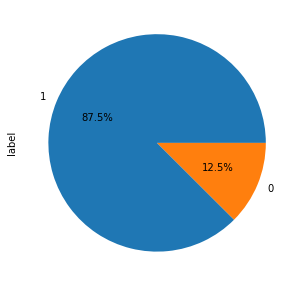

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%')

# DATA FORMATTING

In [11]:
#we will format the date column to day, month & year columns

In [12]:
#we will convert date to day, month & year columns
df['pdate']=pd.to_datetime(df['pdate'])
df['Year'] = df['pdate'].apply(lambda x:x.year)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Day']=df['pdate'].apply(lambda x:x.day)

In [13]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,2016,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,2016,6,22


# DROPPING THE COLUMNS

In [14]:
df.drop(columns=['msisdn', 'pcircle', 'pdate'], inplace=True)

In [15]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,6,22


In [16]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

medianmarechprebal90    float64
maxamnt_loans30         float64
cnt_loans90             float64
fr_da_rech30            float64
cnt_da_rech30           float64
aon                     float64
medianamnt_ma_rech90    float64
medianamnt_loans90      float64
payback30               float64
payback90               float64
medianmarechprebal30    float64
medianamnt_ma_rech30    float64
sumamnt_ma_rech30       float64
fr_ma_rech30            float64
last_rech_date_da       float64
last_rech_date_ma       float64
rental90                float64
rental30                float64
daily_decr90            float64
daily_decr30            float64
medianamnt_loans30      float64
Year                      int64
Month                     int64
maxamnt_loans90           int64
amnt_loans90              int64
label                     int64
amnt_loans30              int64
cnt_loans30               int64
fr_da_rech90              int64
cnt_da_rech90             int64
sumamnt_ma_rech90         int64
fr_ma_re

In [17]:
#Data Summary
df.shape

(209592, 36)

In [18]:
df['Year'].value_counts()

2016    209592
Name: Year, dtype: int64

In [19]:
#Since all the values of the year column are 2016, we shall drop this column

In [20]:
df.drop(columns = ['Year'], inplace=True)

In [21]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [22]:
#encoding might have created a few duplicate columns
df.duplicated().sum()

30

In [23]:
df.drop_duplicates(inplace=True)

# CHECKING CORRELATION 

<AxesSubplot:>

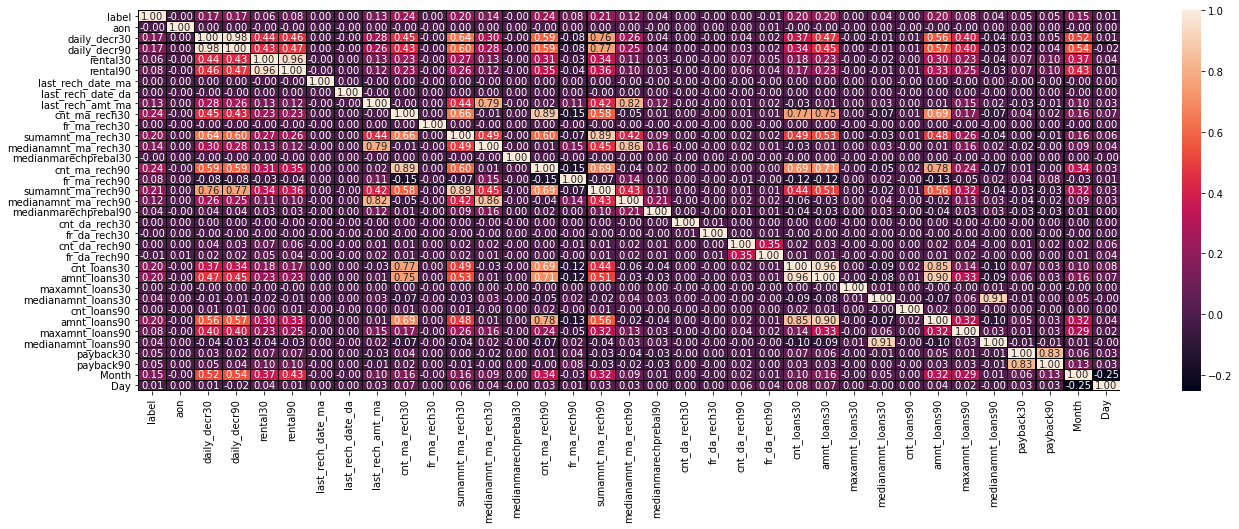

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [25]:
colname=[]
colname_2=[]
correlation=[]
for i in range(len(df.corr().columns)):
    for j in range(i):
        if abs(df.corr().iloc[i,j])>0.68:
            colname.append(df.corr().columns[i]),
            colname_2.append(df.corr().columns[j]),
            correlation.append(df.corr().iloc[i,j])

In [26]:
correlation_house = pd.DataFrame()
correlation_house['Column 1'] = colname
correlation_house['Column 2'] = colname_2
correlation_house['Correlation'] = correlation
correlation_house

,Column 1,Column 2,Correlation
0,daily_decr90,daily_decr30,0.977703
1,rental90,rental30,0.955235
2,medianamnt_ma_rech30,last_rech_amt_ma,0.794624
3,cnt_ma_rech90,cnt_ma_rech30,0.886421
4,sumamnt_ma_rech90,daily_decr30,0.762969
5,sumamnt_ma_rech90,daily_decr90,0.768805
6,sumamnt_ma_rech90,sumamnt_ma_rech30,0.889980
7,sumamnt_ma_rech90,cnt_ma_rech90,0.687026
8,medianamnt_ma_rech90,last_rech_amt_ma,0.818714
9,medianamnt_ma_rech90,medianamnt_ma_rech30,0.864831


In [27]:
#There is a problem of Multi-collinearity between the features

In [28]:
import copy
df2= copy.deepcopy(df)

In [29]:
df2.drop(columns=['sumamnt_ma_rech90'], inplace=True)

In [30]:
X = df2.drop(columns=['label'])
y = df2['label']

# DATA VISUALISATION & FEATURE SELECTION

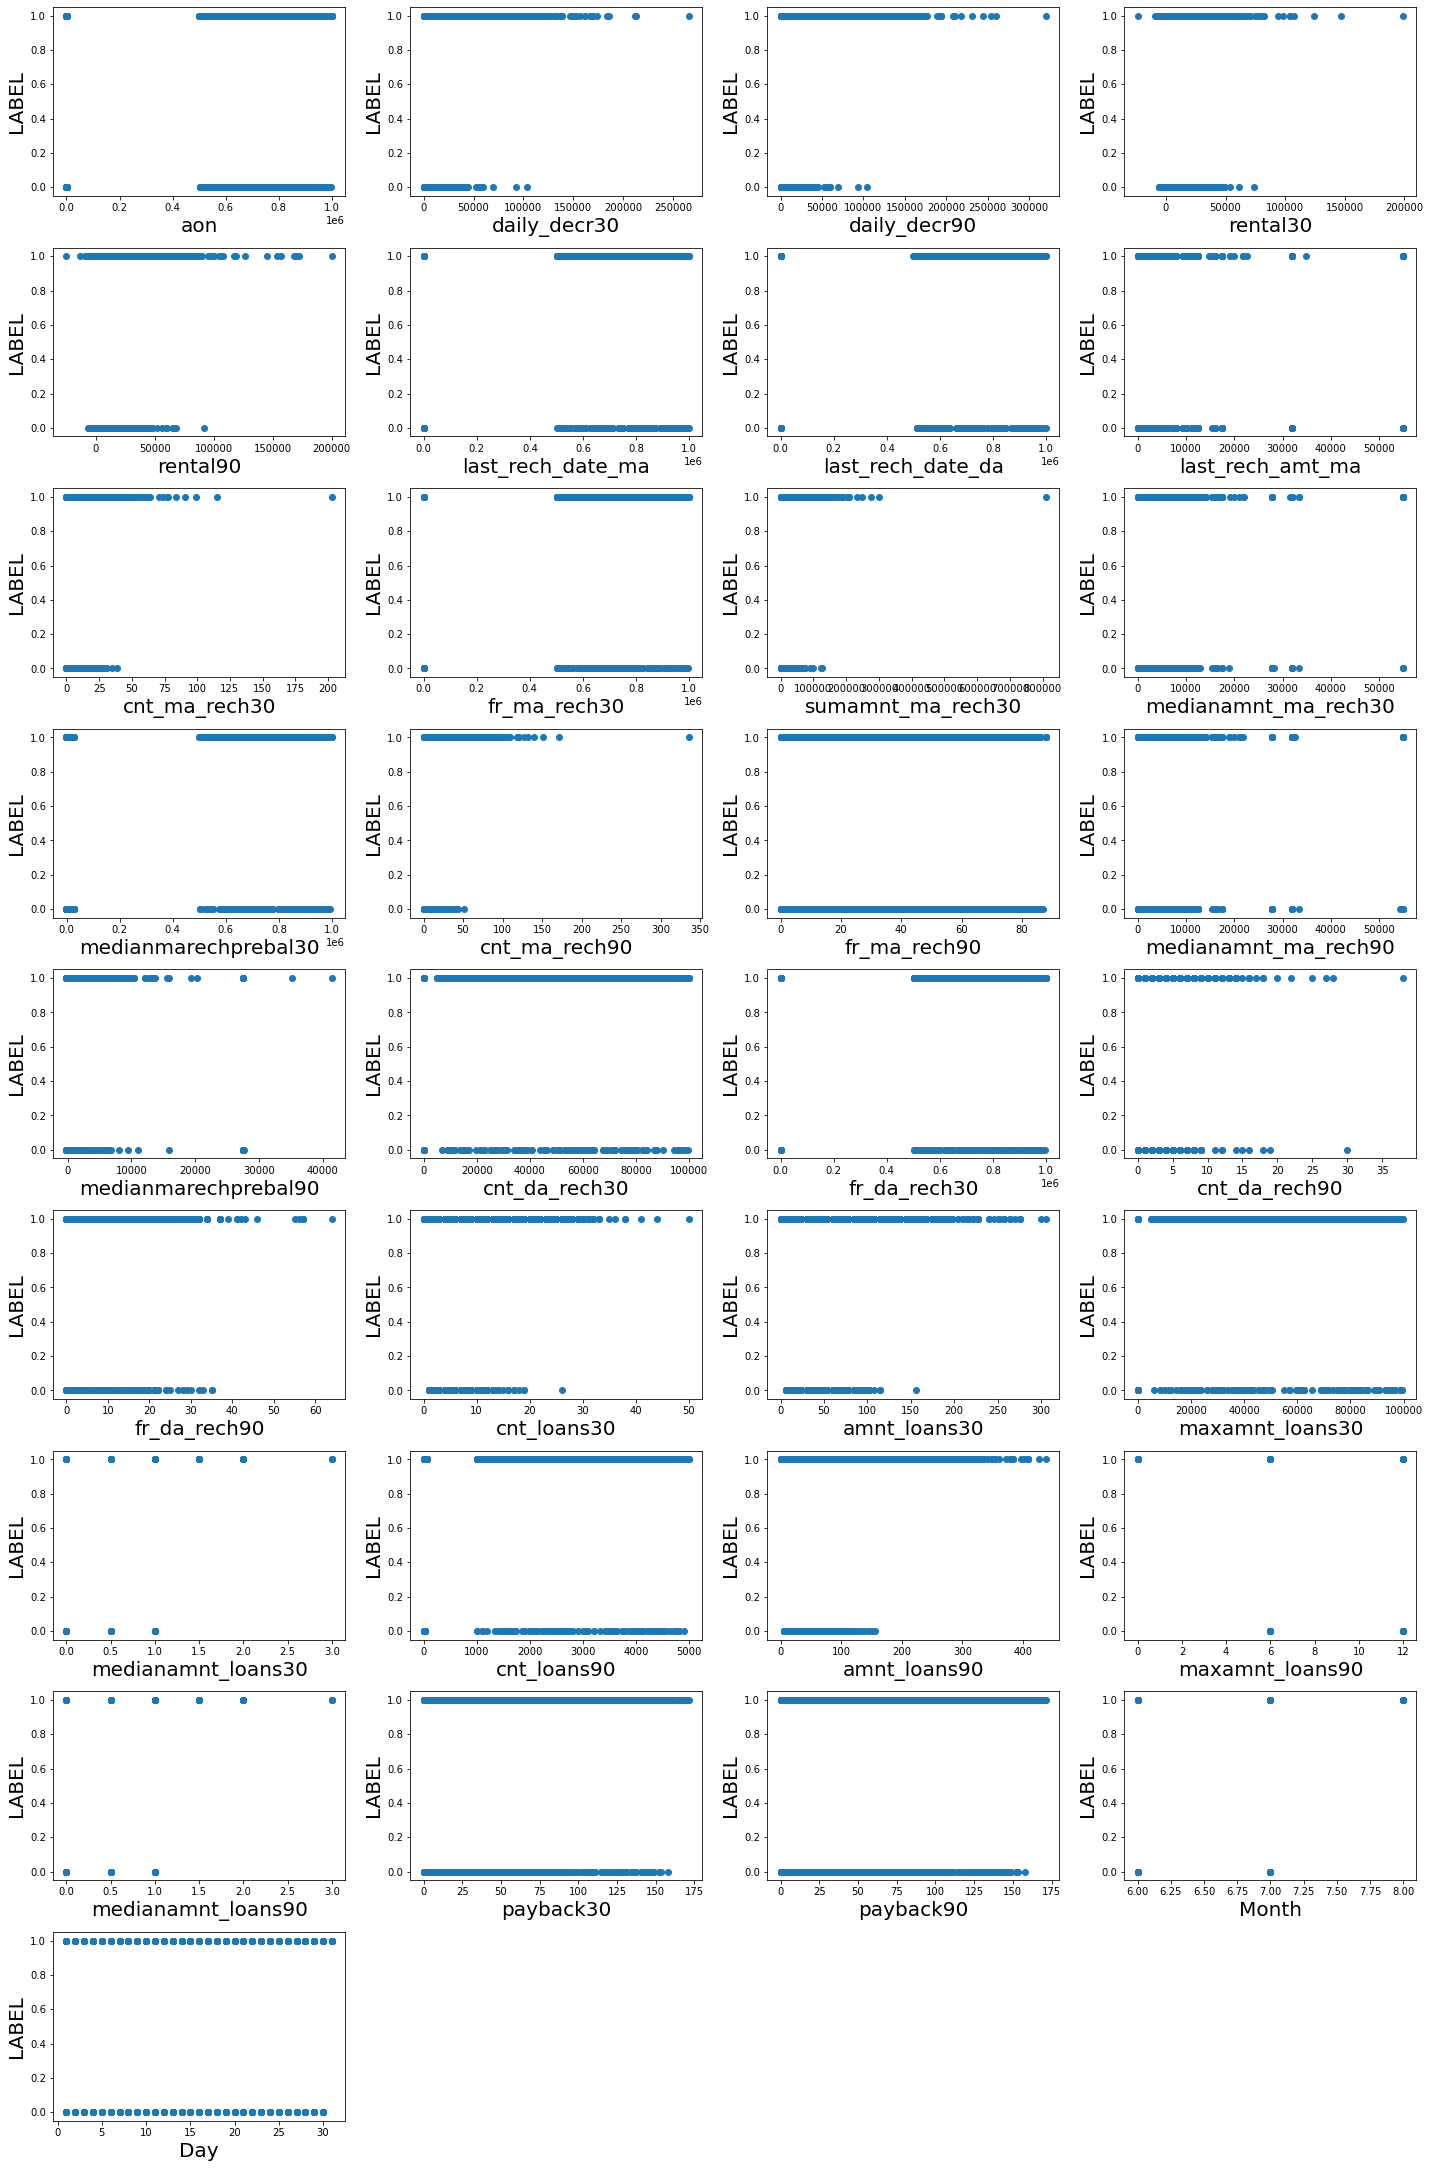

In [31]:
#Visualizing relatinship between feature (continuous) and label (SCATTER PLOT)
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=40: 
		ax=plt.subplot(10,4,plotnumber)
		plt.scatter(df[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('LABEL', fontsize=20)
	plotnumber+=1
plt.tight_layout()

In [32]:
df2.drop(columns=['daily_decr30' , 'rental30', 'last_rech_amt_ma', 'cnt_ma_rech30', 'medianamnt_ma_rech90', 'amnt_loans30', 'amnt_loans90', 'medianamnt_loans30', 'payback30'], inplace=True)

In [33]:
colname=[]
colname_2=[]
correlation=[]
for i in range(len(df2.corr().columns)):
    for j in range(i):
        if abs(df2.corr().iloc[i,j])>0.70:
            colname.append(df2.corr().columns[i]),
            colname_2.append(df2.corr().columns[j]),
            correlation.append(df2.corr().iloc[i,j])

In [34]:
correlation_house = pd.DataFrame()
correlation_house['Column 1'] = colname
correlation_house['Column 2'] = colname_2
correlation_house['Correlation'] = correlation
correlation_house

,Column 1,Column 2,Correlation


In [35]:
#Post dropping the unimportant features, there is no correlation among the features and hence we have avoided the Multicollinearity

In [36]:
import copy
df_backup = copy.deepcopy(df)

In [37]:
df = copy.deepcopy(df2)

In [38]:
#Double checking the dropped column's importance through feature selection method

In [39]:
#FEATURE SELECTION
X=df_backup.drop(columns=['label'])
y=df_backup['label']
#Using SelectKBest feature seleciton Method
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(f_classif, k=34)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores],axis=1)
#name output columns
feature_scores.columns = ['Feaure_Name','Score']
#print 64 best features
top_features = feature_scores.nlargest(34,'Score')
print(feature_scores.nlargest(34,'Score'))

             Feaure_Name         Score
8          cnt_ma_rech30  12484.659526
13         cnt_ma_rech90  12382.298930
15     sumamnt_ma_rech90   9252.518278
10     sumamnt_ma_rech30   8975.282225
27          amnt_loans90   8699.736283
23          amnt_loans30   8472.197209
22           cnt_loans30   8383.935979
1           daily_decr30   6099.372037
2           daily_decr90   5940.760091
32                 Month   5138.623467
11  medianamnt_ma_rech30   4266.025692
7       last_rech_amt_ma   3690.848159
16  medianamnt_ma_rech90   3092.604977
14          fr_ma_rech90   1496.502891
28       maxamnt_loans90   1491.452587
4               rental90   1196.252869
3               rental30    704.561175
31             payback90    505.387447
30             payback30    488.263185
25    medianamnt_loans30    416.200199
17  medianmarechprebal90    322.978193
29    medianamnt_loans90    267.136567
33                   Day      9.210951
21          fr_da_rech90      6.197132
12  medianmarechprebal30 

In [40]:
#The features dropped as compared to their correlated features are of lesser importance

In [41]:
X=df.drop(columns=['label'])
y=df['label']

In [42]:
df.shape

(209562, 25)

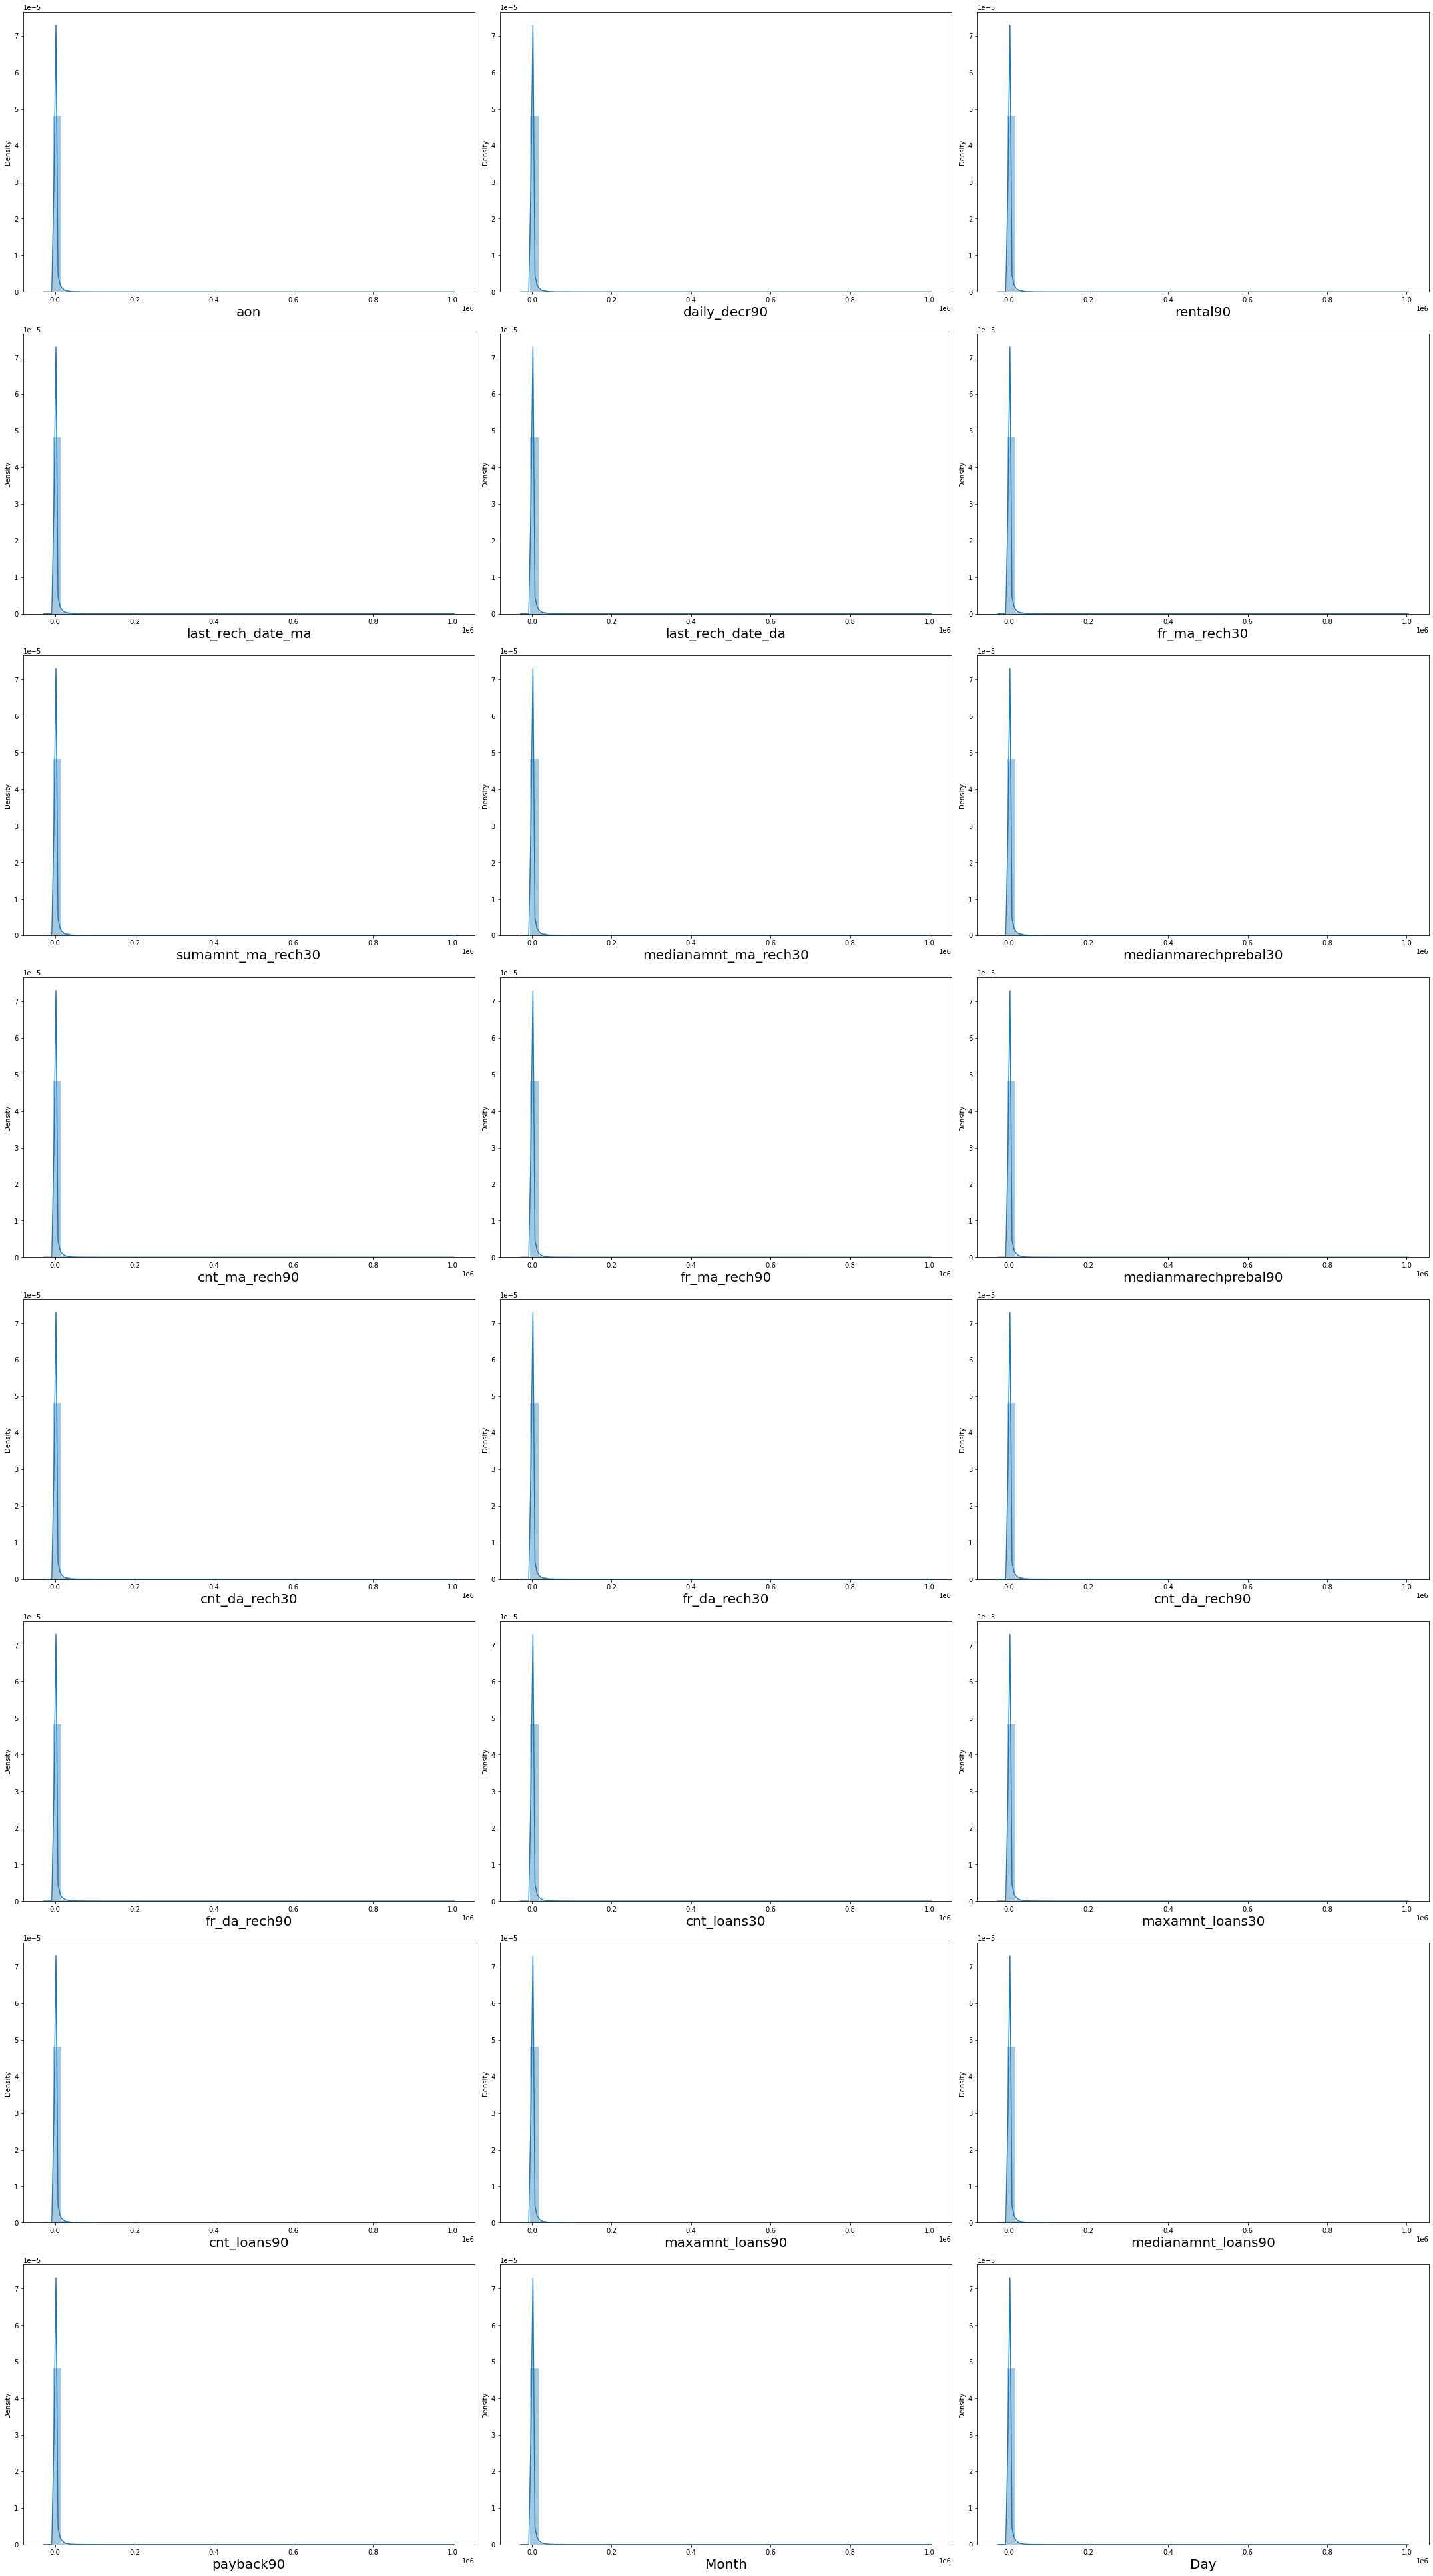

In [43]:
#Visualise the distribution of data in the continous feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (30,60), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(X)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [44]:
#Almost all the features are right skewed and certainly need to be recheked post power transformation

In [45]:
#Checking skewness of the features
np.abs(df.skew()).sort_values(ascending=False)

medianmarechprebal90    44.877678
fr_da_rech90            28.985932
cnt_da_rech90           27.265281
cnt_da_rech30           17.817034
maxamnt_loans30         17.656733
cnt_loans90             16.593169
last_rech_date_da       14.813747
last_rech_date_ma       14.789865
medianmarechprebal30    14.778767
fr_da_rech30            14.775322
fr_ma_rech30            14.771725
aon                     10.392159
payback90                6.900024
sumamnt_ma_rech30        6.386845
medianamnt_loans90       4.895315
rental90                 4.437471
daily_decr90             4.252312
medianamnt_ma_rech30     3.512361
cnt_ma_rech90            3.425285
cnt_loans30              2.713259
fr_ma_rech90             2.285206
label                    2.271915
maxamnt_loans90          1.678078
Month                    0.343080
Day                      0.199744
dtype: float64

In [46]:
#Dividing all the continuous features in lists

In [47]:
cont1 = ['aon', 'cnt_da_rech30' , 'cnt_loans90', 'fr_da_rech30', 'fr_ma_rech30' , 'last_rech_date_ma' , 'maxamnt_loans30', 'medianmarechprebal30', 'medianmarechprebal90', 'payback90', 'rental90']

cont2 = ['daily_decr90'] 

cont3 = ['last_rech_date_da']

cont = ['aon', 'cnt_da_rech30' , 'cnt_loans90', 'daily_decr90', 'fr_da_rech30', 'fr_ma_rech30', 'last_rech_date_da', 'last_rech_date_ma' , 'maxamnt_loans30', 'medianmarechprebal30', 'medianmarechprebal90', 'payback90', 'rental90']

In [48]:
from sklearn.preprocessing import power_transform
df_new = power_transform(df[cont1])
df[cont1]=pd.DataFrame(df_new,columns=cont1)
df[cont1].skew().sort_values(ascending=False) #validating that the skewness is removed

fr_da_rech30            11.388942
medianmarechprebal90     7.507532
cnt_da_rech30            6.925627
aon                      1.654579
payback90                0.210808
fr_ma_rech30             0.164913
cnt_loans90              0.105516
medianmarechprebal30    -0.118234
rental90                -0.960392
maxamnt_loans30         -1.682050
last_rech_date_ma       -5.361293
dtype: float64

In [49]:
df['daily_decr90'] = np.sqrt(df['daily_decr90'])

In [50]:
df.isnull().sum()

label                      0
aon                       31
daily_decr90            1838
rental90                  31
last_rech_date_ma         31
last_rech_date_da          0
fr_ma_rech30              31
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30      31
cnt_ma_rech90              0
fr_ma_rech90               0
medianmarechprebal90      31
cnt_da_rech30             31
fr_da_rech30              31
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
maxamnt_loans30           31
cnt_loans90               31
maxamnt_loans90            0
medianamnt_loans90         0
payback90                 31
Month                      0
Day                        0
dtype: int64

In [51]:
df.dropna(inplace=True)

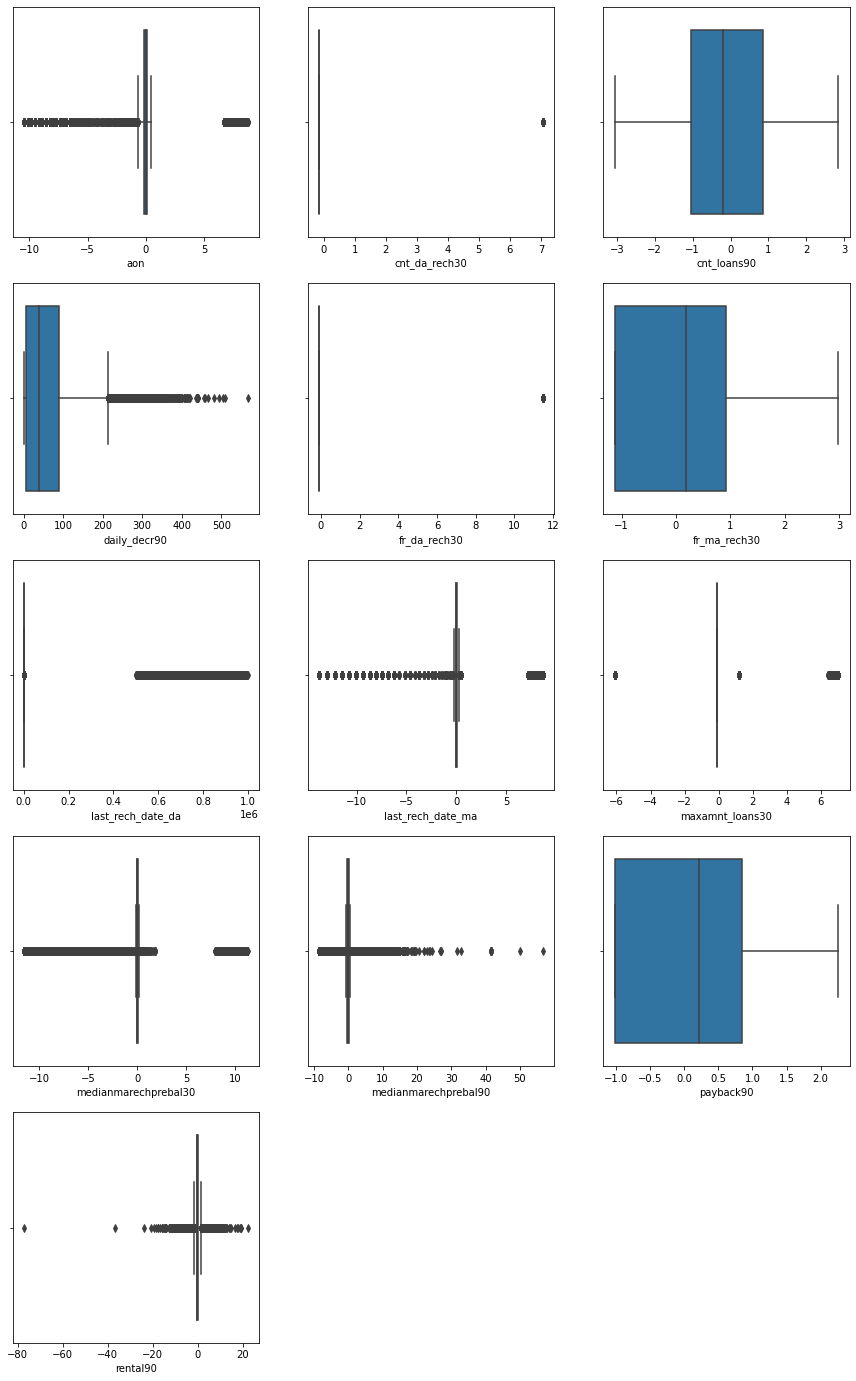

In [52]:
#Visualizing the outliers using BOXPLOT
X1 = df[cont]

plt.figure(figsize=(15,50))
graph=1

for column in X1:
	if graph<=30: 
		ax=plt.subplot(10,3,graph)
		sns.boxplot(X1[column],orient='v')
		plt.xlabel(column,fontsize=10)
	graph+=1
plt.show()

In [53]:
#The data is such that we will be unable to remove the outliers

# DIVIDING INTO FEATURES & LABELS

In [54]:
X = df.drop(columns=['label'])
y = df['label']

# DATA SCALING

In [55]:
#Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# FINDING BEST RANDOM STATE

In [56]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
	x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=i)
	LR = LogisticRegression()
	LR.fit(x_train,y_train)
	predrf=LR.predict(x_test)
	acc=accuracy_score(y_test,predrf)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.884428965782885 on Random State 74


# USING SMOTE FOR DOWNSAMPLING THE IMBALANCED DATASET

In [57]:
#CREATING TRAIN-TEST SPLIT
x_train_imb, x_test, y_train_imb, y_test =  train_test_split(X_scaled, y, test_size=0.05, random_state=74)

In [58]:
print(x_train_imb.shape)
print(y_train_imb.shape)
print(x_test.shape)
print(y_test.shape)

(197308, 24)
(197308,)
(10385, 24)
(10385,)


1    183119
0     24574
Name: label, dtype: int64


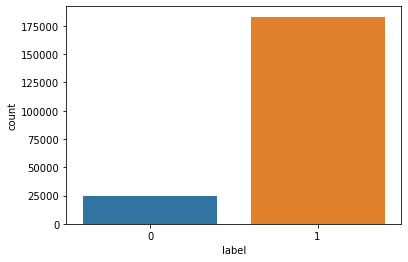

In [59]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="label", data=df)
print(df['label'].value_counts())

In [60]:
print(y_train_imb.value_counts())

1    173911
0     23397
Name: label, dtype: int64


In [61]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
down_smp=RandomUnderSampler(0.99)
x_train_ns,y_train_ns=down_smp.fit_sample(x_train_imb,y_train_imb)
from collections import Counter
print('The no of samples before fit()', format(Counter(y_train_imb)))
print('The no of samples after fit()', format(Counter(y_train_ns)))

The no of samples before fit() Counter({1: 173911, 0: 23397})
The no of samples after fit() Counter({1: 23633, 0: 23397})


In [62]:
print(y_train_ns.value_counts())

1    23633
0    23397
Name: label, dtype: int64


In [63]:
import copy
x_train = copy.deepcopy(x_train_ns)
y_train = copy.deepcopy(y_train_ns)

In [64]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(47030, 24)
(47030,)
(10385, 24)
(10385,)


# APPLYING CLASSIFICATION MODELS

In [65]:
model_name=[]
acc=[]
roc=[]

In [66]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
model_name.append('Logistic Regression')
acc.append(accuracy_score(y_test,y_pred)*100)
print("Accuracy", accuracy_score(y_test,y_pred)*100)

Accuracy 70.11073663938373


In [67]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
model_name.append('Decision Tree')
acc.append(accuracy_score(y_test,y_pred_dt)*100)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)

Accuracy 78.43042850264806


In [68]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
model_name.append('SVC')
acc.append(accuracy_score(y_test,y_pred_svc)*100)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)

Accuracy 76.57197881559942


In [69]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
model_name.append('Random Forest')
acc.append(accuracy_score(y_test,y_pred_rf)*100)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)

Accuracy 84.46798266730862


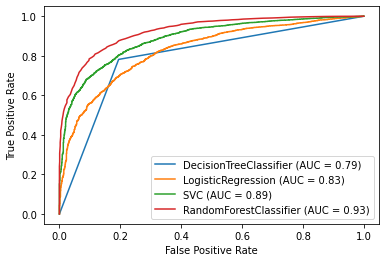

In [70]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [71]:
roc.append(0.83)
roc.append(0.79)
roc.append(0.89)
roc.append(0.93)

In [72]:
import pandas as pd
Classification_Scores = pd.DataFrame()
Classification_Scores['Model Name']= model_name
Classification_Scores['Accuracy']=acc
Classification_Scores['ROC AUC SCORE']=roc
Classification_Scores

,Model Name,Accuracy,ROC AUC SCORE
0,Logistic Regression,70.110737,0.83
1,Decision Tree,78.430429,0.79
2,SVC,76.571979,0.89
3,Random Forest,84.467983,0.93


In [73]:
#Random Forest Classification Model has got the highest accuracy score and ROC-AUC Score

# HYPER PARAMETER TUNING

In [74]:
#GRIDSEARCH CV WITH RANDOMFOREST CLASSIFIER

In [75]:
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
			'criterion': ['entropy', 'gini'],
			'max_depth': [10,15],
			'min_samples_split':[10,11],
			'min_samples_leaf':[5,6]
		}
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [76]:
GCV_RF = GridSearchCV(RandomForestClassifier(),params,cv=5,scoring='accuracy')
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_
GCV_pred=GCV_RF.best_estimator_.predict(x_test) #predicting with best parameters
print(accuracy_score(y_test,GCV_pred))

0.8237843042850265


# SAVING THE MODEL

In [77]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
import joblib
joblib.dump(GCV_RF.best_estimator_,"Micro Credit.pkl")

['Micro Credit.pkl']